<a href="https://colab.research.google.com/github/SahilR02/ADS-Experiments/blob/main/ADS%20Experiment%206/ADS_Exp6_SahilR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ADS Experiment No.6**

**Importing required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sys
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


In [ ]:
data = pd.read_csv('Housing_Price_Data.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
# DataFrame info
print("\nDataFrame info:")
print(data.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


**KNN**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# Standardize the numerical columns
scaler = StandardScaler()
numerical_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data_scaled = scaler.fit_transform(data[numerical_cols])

# Outlier detection using KNN
# Compute distances
nbrs = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)

# Set your threshold for outlier detection
threshold = 2.0

# Identify outliers
outlier_indices_knn = []
for i, distances_row in enumerate(distances):
    if max(distances_row) > threshold:
        outlier_indices_knn.append(i)

print("Outliers detected using KNN:")
print(outlier_indices_knn)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Outliers detected using KNN:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 28, 33, 34, 47, 56, 69, 89, 112, 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data.mainroad=le.fit_transform(data.mainroad)
data.guestroom=le.fit_transform(data.guestroom)
data.basement=le.fit_transform(data.basement)
data.hotwaterheating=le.fit_transform(data.hotwaterheating)
data.airconditioning=le.fit_transform(data.airconditioning)
data.prefarea=le.fit_transform(data.prefarea)
data.furnishingstatus=le.fit_transform(data.furnishingstatus)

In [ ]:
features,target=data.drop(["price"],axis='columns'),data["price"]

**Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.score(x_train,y_train)

0.6767163045722328

In [ ]:
pred=model.predict(x_train)
pred_actual=pd.DataFrame({"Pred":pred,"Actual":y_train})
pred_actual.head()

,Pred,Actual
539,2.427634e+06,1855000
21,6.832575e+06,8680000
232,3.956895e+06,4655000
500,2.597284e+06,2660000
496,2.780941e+06,2695000


In [ ]:
error=y_train-pred
np.mean(error)

2.2215033889910498e-10

(array([ 10.,  36., 112., 152.,  81.,  30.,   8.,   1.,   3.,   3.]),
 array([-2720380.06362148, -1938989.82231446, -1157599.58100743,
         -376209.33970041,   405180.90160661,  1186571.14291364,
         1967961.38422066,  2749351.62552768,  3530741.86683471,
         4312132.10814173,  5093522.34944876]),
 <BarContainer object of 10 artists>)

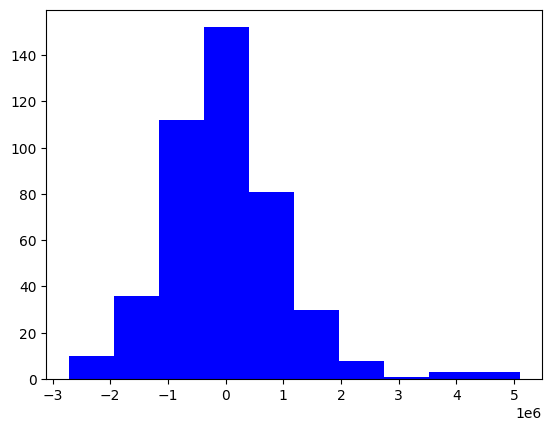

In [ ]:
plt.hist(error,color='b')

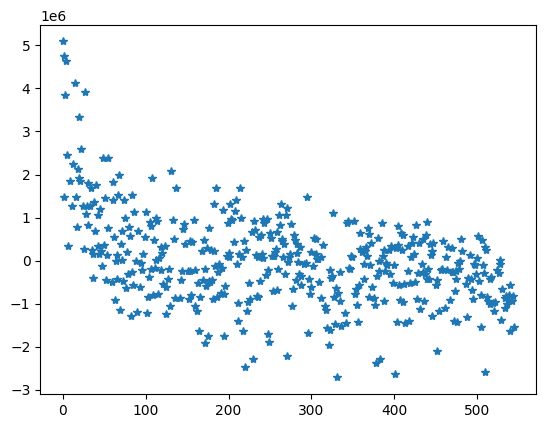

In [ ]:
plt.plot(error,"*")

<Axes: xlabel='Actual', ylabel='Pred'>

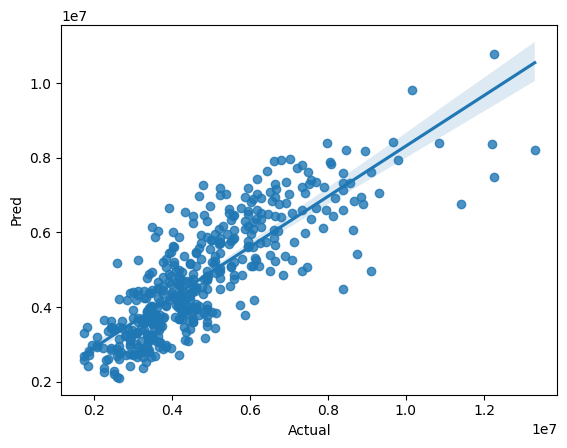

In [ ]:
sns.regplot(x=pred_actual.Actual,y=pred_actual.Pred)

In [ ]:
x=np.array(pred_actual)

In [ ]:
from sklearn.covariance import EllipticEnvelope
elpenv=EllipticEnvelope(contamination=0.05)
pred=elpenv.fit_predict(x)
pred

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1

In [ ]:
l1=list(pred)
l1.count(-1) #count of outliers

22

In [ ]:
index_for_outlier=np.where(pred==-1)
print("Outlier indexes are: ",index_for_outlier)
print()

Outlier indexes are:  (array([  1,  29,  35,  55,  70,  86, 106, 107, 122, 142, 148, 178, 179,
       180, 201, 224, 234, 241, 300, 301, 396, 422]),)



In [ ]:
outlier_values=x[index_for_outlier]
outlier_values

array([[ 6832575.32916171,  8680000.        ],
       [ 6600439.31539323,  8400000.        ],
       [ 8180364.25516779,  8960000.        ],
       [ 4976458.56531375,  9100000.        ],
       [ 5420895.94479438,  8750000.        ],
       [ 7617475.92643776,  9100000.        ],
       [ 7497699.22966203, 12250000.        ],
       [ 7319069.34104303,  8575000.        ],
       [ 9811883.4686965 , 10150000.        ],
       [ 6054625.63115935,  8645000.        ],
       [ 8413221.31816121,  9681000.        ],
       [ 8367496.62921246, 12215000.        ],
       [ 7066627.98534123,  9310000.        ],
       [ 8206477.65055124, 13300000.        ],
       [ 4473790.77898426,  8400000.        ],
       [ 5069680.04597132,  7455000.        ],
       [ 6760896.76240247, 11410000.        ],
       [ 8387997.72148359, 10850000.        ],
       [ 6754336.57280258,  8890000.        ],
       [ 6943159.97162835,  8855000.        ],
       [ 7943502.53433012,  9800000.        ],
       [10778

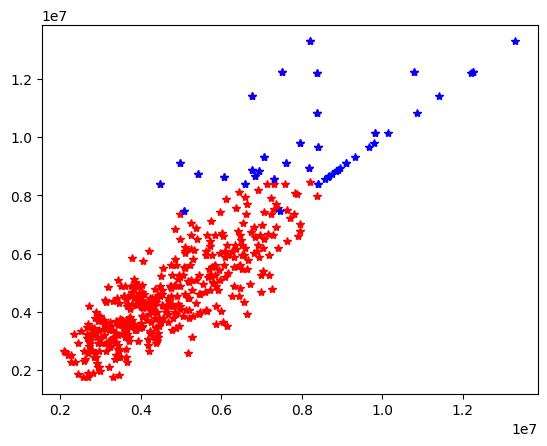

In [ ]:
plt.plot(x[:,0],x[:,1],"*",color="r")
plt.plot(outlier_values,outlier_values[:,1],"*",color="b")